### LychSim Plugin Intro

In [1]:
import io

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from lychsim.api import Client

##### Connect to the UE5

In [2]:
client = Client(('localhost', 9000))
client.connect()

INFO:client:235:Got connection confirm: b'connected to MyProject3'


=>Info: using ip-port socket


True

##### Check connection status

In [3]:
res = client.request('vget /unrealcv/status')
print(res)

Is Listening
Client Connected
9000
Configuration
Config file: C:/Program Files/Epic Games/UE_5.5/Engine/Binaries/Win64/unrealcv.ini
Port: 9000
Width: 640
Height: 480
FOV: 90.000000
EnableInput: true
EnableRightEye: false



##### Get RGBA rendering

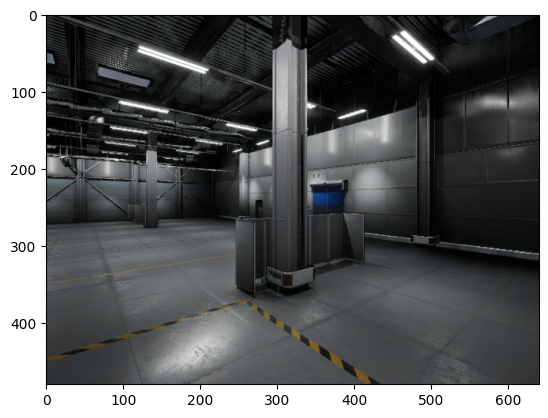

In [24]:
def get_rgba():
    res = client.request('vget /camera/1/lit png')
    return np.array(Image.open(io.BytesIO(res)))

img = get_rgba()
plt.imshow(img)

##### Get depth

347.25 2048.0


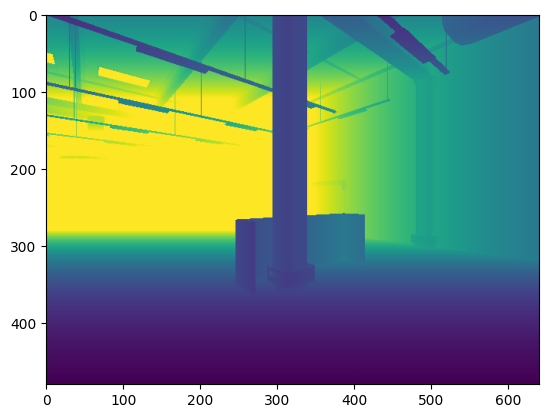

In [25]:
def get_depth():
    res = client.request('vget /camera/1/depth npy')
    return np.load(io.BytesIO(res))

depth = get_depth().clip(0.0, 2048.0)
print(depth.min(), depth.max())

plt.imshow(depth)